In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import fiona
from scipy import stats

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
clean_17 = pd.read_csv('Data/df_2017_clean.csv')[:-1]
clean_18 = pd.read_csv('Data/df_2018_clean.csv')[:-1]
clean_19 = pd.read_csv('Data/df_2019_clean.csv')[:-1]
clean_20 = pd.read_csv('Data/df_2020_clean.csv')[:-1]
dem = pd.read_csv('Data/demographic_data.csv').drop(columns=['Unnamed: 0', 'avg_population'])
precincts = gpd.read_file("Data/Police Precincts/geo_export_8a329a70-4d06-4684-a4c1-46393505b313.shp")
pop = pd.read_csv("Data/nyc_2010pop_2020precincts.csv")

In [4]:
pop['P0010001'].mean()

106170.55844155845

In [5]:
pop['P0010001'].std()

48735.564049236134

In [6]:
clean_17

,precinct,jan,feb,march,april,may,june,july,aug,sept,oct,nov,dec
0,1,32,34,48,55,48,60,44,44,30,39,26,44
1,5,47,68,53,35,51,37,57,58,53,60,35,55
2,6,22,20,17,34,22,16,25,24,27,27,42,30
3,7,122,116,111,84,103,107,121,102,93,115,125,113
4,9,130,109,103,117,133,91,96,109,97,114,126,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,115,240,191,195,256,226,214,233,237,240,243,226,248
73,120,384,334,345,392,403,414,411,396,366,449,346,400
74,121,280,233,219,215,264,265,302,265,260,242,254,231
75,122,165,154,145,165,187,198,191,189,180,200,170,175


In [7]:
clean_17['total_complaints_17'] = clean_17.iloc[:, 1:13].sum(axis=1)
clean_17 = clean_17.astype({'precinct': float})
avg_pop = pop[['precinct_2020', 'P0010001']]
avg_pop = avg_pop.astype({'precinct_2020': float})
clean_17 = clean_17.merge(avg_pop, left_on='precinct', right_on='precinct_2020')
clean_17['total_complaints_17_per_capita'] = (clean_17['total_complaints_17']/clean_17['P0010001'])*100

clean_18['total_complaints_18'] = clean_18.iloc[:, 1:].sum(axis=1)
clean_18 = clean_18.astype({'precinct': float})
clean_18 = clean_18.merge(avg_pop, left_on='precinct', right_on='precinct_2020')
clean_18['total_complaints_18_per_capita'] = (clean_18['total_complaints_18']/clean_18['P0010001'])*100

clean_19['total_complaints_19'] = clean_19.iloc[:, 1:].sum(axis=1)
clean_19 = clean_19.astype({'precinct': float})
clean_19 = clean_19.merge(avg_pop, left_on='precinct', right_on='precinct_2020')
clean_19['total_complaints_19_per_capita'] = (clean_19['total_complaints_19']/clean_19['P0010001'])*100

clean_20['total_complaints_20'] = clean_20.iloc[:, 1:].sum(axis=1)
clean_20 = clean_20.astype({'precinct': float})
clean_20 = clean_20.merge(avg_pop, left_on='precinct', right_on='precinct_2020')
clean_20['total_complaints_20_per_capita'] = (clean_20['total_complaints_20']/clean_20['P0010001'])*100

In [8]:
totals_allyears = clean_17['precinct'].to_frame()
totals_allyears['total_complaints_17_per_capita'] = clean_17['total_complaints_17_per_capita']
totals_allyears['total_complaints_18_per_capita'] = clean_18['total_complaints_18_per_capita']
totals_allyears['total_complaints_19_per_capita'] = clean_19['total_complaints_19_per_capita']
totals_allyears['total_complaints_20_per_capita'] = clean_20['total_complaints_20_per_capita']
totals_allyears['avg_dv_17_18_19'] = (totals_allyears['total_complaints_17_per_capita'] + totals_allyears['total_complaints_18_per_capita'] + totals_allyears['total_complaints_19_per_capita'])/3

In [9]:
merged_totals = dem.merge(totals_allyears, on='precinct')

In [10]:
merged_totals_plot =  precincts.merge(merged_totals, on='precinct')

In [11]:
merged_totals_plot['centers'] = merged_totals_plot['geometry'].centroid

/Users/eeshakhanna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [12]:
merged_totals_plot.dropna(inplace=True)

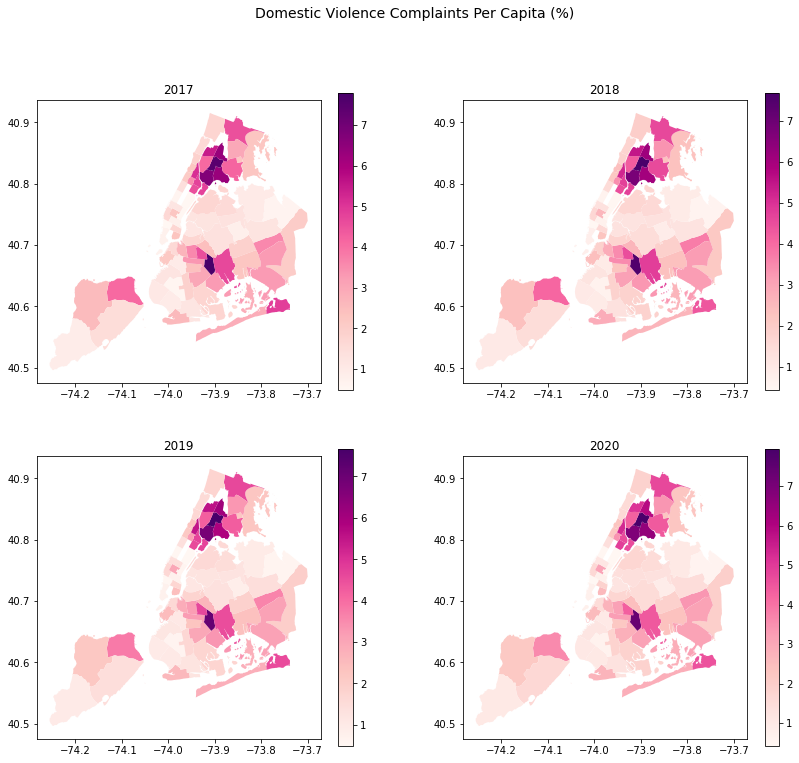

In [13]:
cbar_num_format = "%d"

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(14, 12)
fig.suptitle('Domestic Violence Complaints Per Capita (%)', fontsize=14)
merged_totals_plot.plot(column='total_complaints_17_per_capita', cmap='RdPu', legend=True, ax=ax1)

ax1.title.set_text('2017')
merged_totals_plot.plot(column='total_complaints_18_per_capita', cmap='RdPu', legend=True, ax=ax2)

ax2.title.set_text('2018')
merged_totals_plot.plot(column='total_complaints_19_per_capita', cmap='RdPu', legend=True, ax=ax3)

ax3.title.set_text('2019')
merged_totals_plot.plot(column='total_complaints_20_per_capita', cmap='RdPu', legend=True, ax=ax4)

ax4.title.set_text('2020')

In [14]:
merged_totals_plot['centers']

0     POINT (-74.01207 40.70979)
2     POINT (-74.00237 40.73365)
3     POINT (-73.94693 40.66280)
4     POINT (-74.00113 40.65197)
5     POINT (-73.98395 40.71544)
                 ...            
71    POINT (-73.87621 40.76261)
72    POINT (-74.09643 40.62526)
73    POINT (-74.16620 40.60682)
74    POINT (-74.11592 40.57554)
75    POINT (-74.20586 40.53682)
Name: centers, Length: 74, dtype: geometry

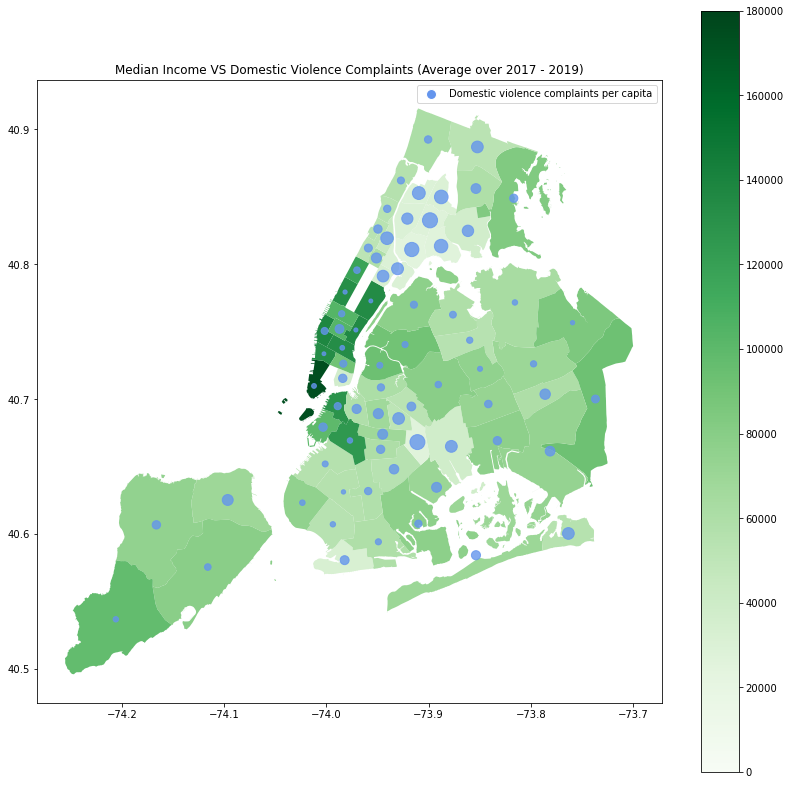

In [15]:
base = merged_totals_plot.plot(column='avg_median_income', cmap='Greens', legend=True, figsize=(14, 14),
                              vmin=0, vmax=180000)
base2 = merged_totals_plot['centers'].plot(ax=base, marker='o', alpha=0.8, 
                                   markersize=merged_totals_plot['avg_dv_17_18_19']*30,
                                   color='cornflowerblue')

plt.title('Median Income VS Domestic Violence Complaints (Average over 2017 - 2019)')

dv_leg = Line2D([0], [0], marker='o', color='w', label='Domestic violence complaints per capita',
                        markerfacecolor='cornflowerblue', markersize=10)

plt.legend(handles=[dv_leg])

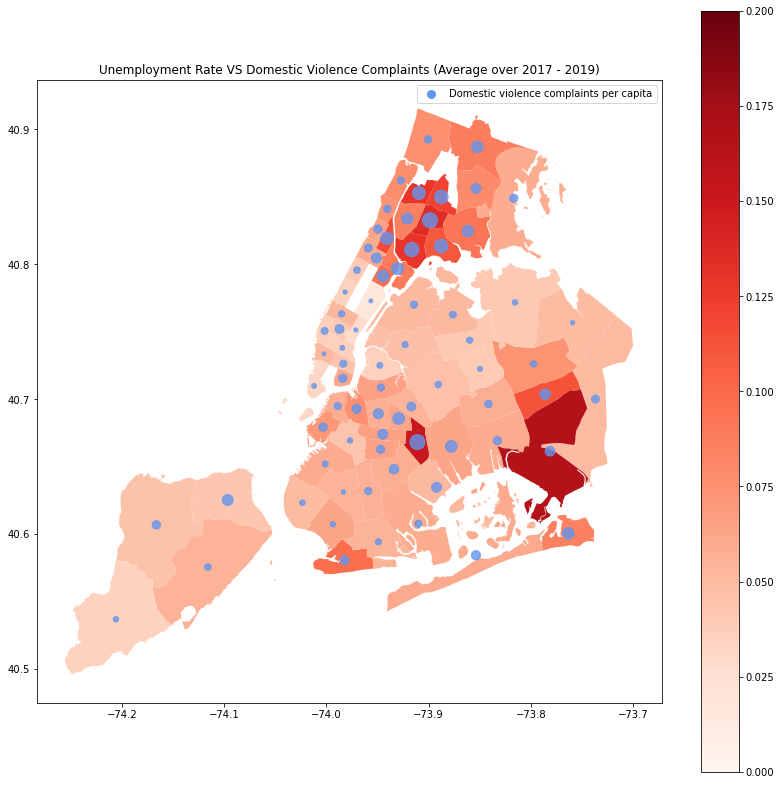

In [16]:
base = merged_totals_plot.plot(column='avg_unemployment_rate', cmap='Reds', legend=True, figsize=(14, 14),
                              vmin=0, vmax=0.2)
base2 = merged_totals_plot['centers'].plot(ax=base, marker='o', alpha=0.8, 
                                   markersize=merged_totals_plot['avg_dv_17_18_19']*30,
                                   color='cornflowerblue')

plt.title('Unemployment Rate VS Domestic Violence Complaints (Average over 2017 - 2019)')

dv_leg = Line2D([0], [0], marker='o', color='w', label='Domestic violence complaints per capita',
                        markerfacecolor='cornflowerblue', markersize=10)

plt.legend(handles=[dv_leg])

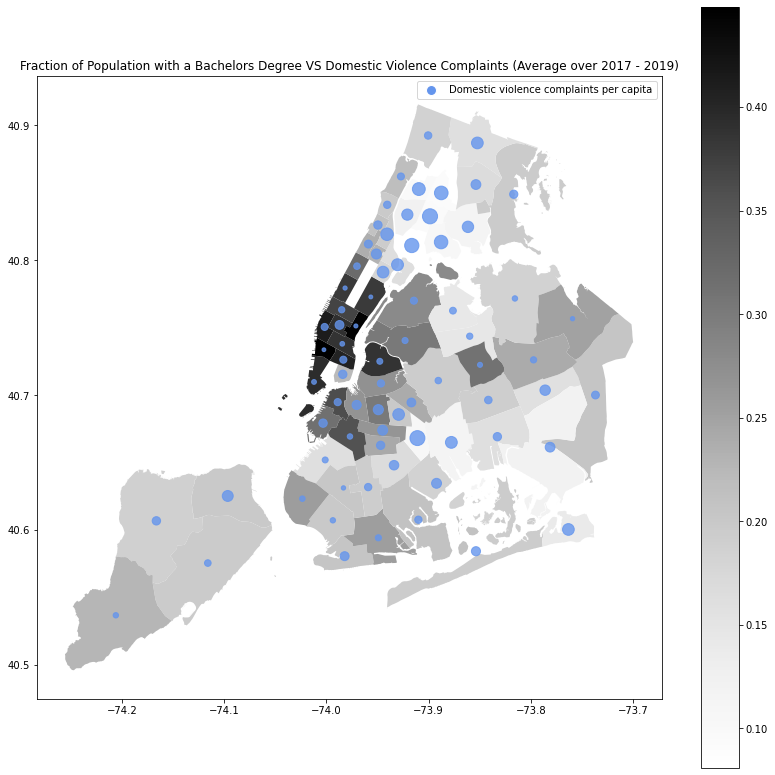

In [17]:
base = merged_totals_plot.plot(column='avg_bachelors_frac', cmap='Greys', legend=True, figsize=(14, 14))
base2 = merged_totals_plot['centers'].plot(ax=base, marker='o', alpha=0.8, 
                                   markersize=merged_totals_plot['avg_dv_17_18_19']*30,
                                   color='cornflowerblue')

plt.title('Fraction of Population with a Bachelors Degree VS Domestic Violence Complaints (Average over 2017 - 2019)')

dv_leg = Line2D([0], [0], marker='o', color='w', label='Domestic violence complaints per capita',
                        markerfacecolor='cornflowerblue', markersize=10)

plt.legend(handles=[dv_leg])

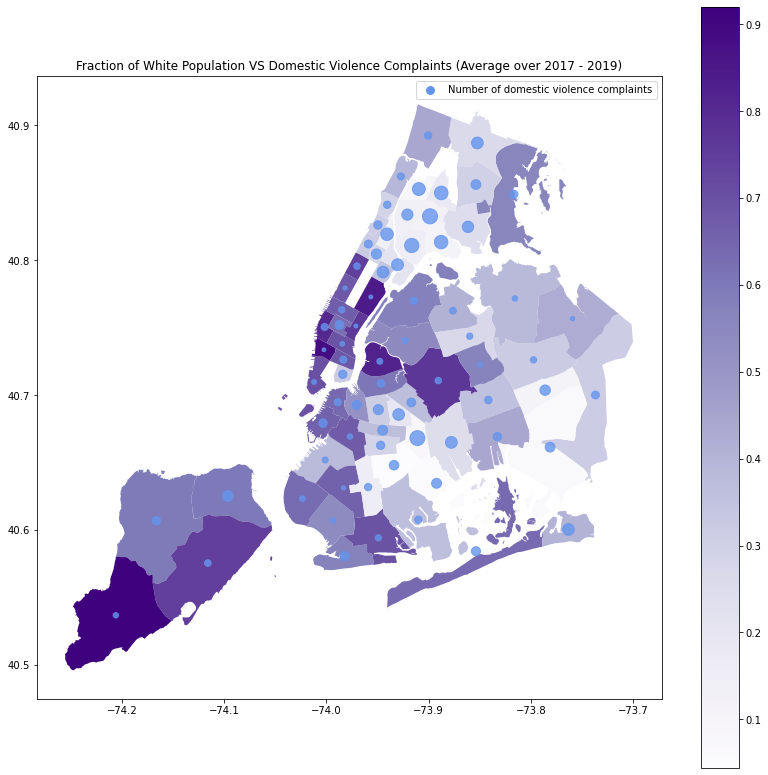

In [18]:
base = merged_totals_plot.plot(column='avg_white_frac', cmap='Purples', legend=True, figsize=(14, 14))
base2 = merged_totals_plot['centers'].plot(ax=base, marker='o', alpha=0.8, 
                                   markersize=merged_totals_plot['avg_dv_17_18_19']*30,
                                   color='cornflowerblue')

plt.title('Fraction of White Population VS Domestic Violence Complaints (Average over 2017 - 2019)')

dv_leg = Line2D([0], [0], marker='o', color='w', label='Number of domestic violence complaints',
                        markerfacecolor='cornflowerblue', markersize=10)

plt.legend(handles=[dv_leg])

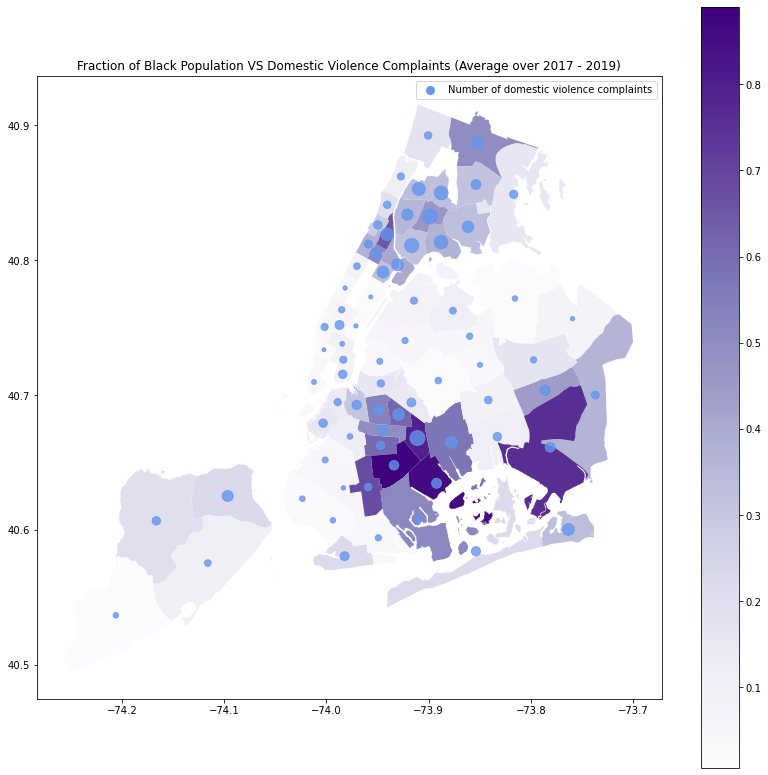

In [19]:
base = merged_totals_plot.plot(column='avg_black_frac', cmap='Purples', legend=True, figsize=(14, 14))
base2 = merged_totals_plot['centers'].plot(ax=base, marker='o', alpha=0.8, 
                                   markersize=merged_totals_plot['avg_dv_17_18_19']*30,
                                   color='cornflowerblue')

plt.title('Fraction of Black Population VS Domestic Violence Complaints (Average over 2017 - 2019)')

dv_leg = Line2D([0], [0], marker='o', color='w', label='Number of domestic violence complaints',
                        markerfacecolor='cornflowerblue', markersize=10)

plt.legend(handles=[dv_leg])